## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [10]:
%pylab inline
data_dir = "../../UCSD_BigData_2016/Data/Weather"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [18]:
#!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle
!curl -o $data_dir/STAT_TAVG_RANGE.pickl http://mas-dse-open.s3.amazonaws.com/Weather/STAT_TAVG_RANGE.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.6M  100 25.6M    0     0  6268k      0  0:00:04  0:00:04 --:--:-- 6268k


### Get the statistics from the Pickle File

In [19]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT_TAVG_RANGE.pickl','r'))

In [20]:
STAT.keys()

['TAVG', 'TRANGE']

In [21]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [22]:
Scalars=['mean','std','low1000','low100','high100','high1000']
readme_filename = data_dir+'ghcnd-readme.txt'
for meas in STAT.keys():
    !grep $meas $readme_filename
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

grep: ../../UCSD_BigData_2016/Data/Weatherghcnd-readme.txt: No such file or directory
mean:110.231356 std:112.761753 low1000:-177.500000 low100:-177.500000 high100:302.500000 high1000:344.500000
grep: ../../UCSD_BigData_2016/Data/Weatherghcnd-readme.txt: No such file or directory
mean:131.168448 std:61.742075 low1000:22.000000 low100:22.000000 high100:267.000000 high1000:317.000000


### Script for plotting yearly plots 

In [23]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

In [24]:
def MyYearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7),color=None,drawgrid=False):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    dim = (1,T.shape[0]) if T.ndim==1 else T.shape
    if dim[1] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if color==None:
        color = 'b' * dim[0]
    for row in range(dim[0]):
        plot_date(yearday,T if dim[0]==1 else T[row],'-'+color[row])
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    if drawgrid:
        grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

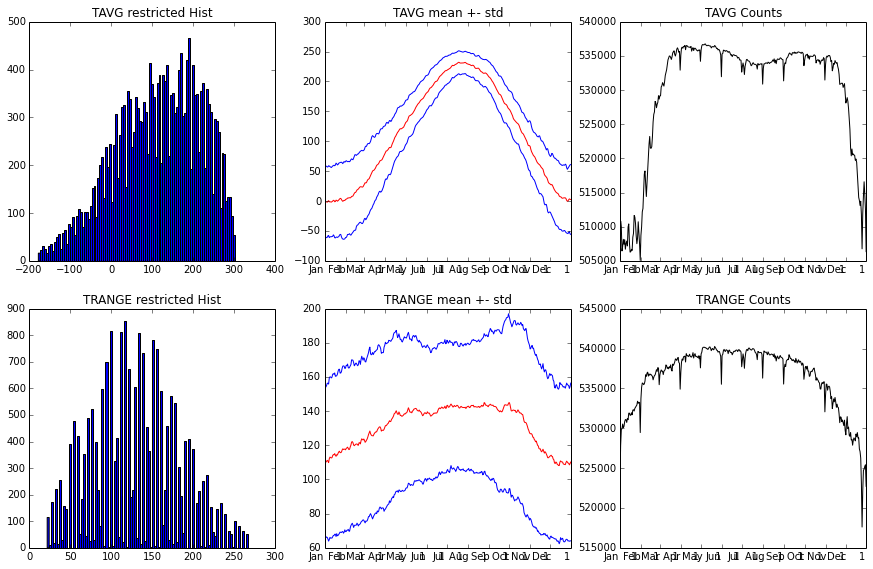

In [25]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    
    data = STAT[meas]
    ## Your code for Histogram
    restdsamples = np.array([x for x in data['SortedVals'] if ~np.isnan(x) and x<=data['high100'] and x>=data['low100']])
    plt.hist(restdsamples,100);
    title(meas+' restricted Hist')
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    meanvalue = data['Mean']
    varance = data['Var']/data['std']
    MyYearlyPlots(np.array([meanvalue,meanvalue+varance,meanvalue-varance]),ttl=meas+' mean +- std',color='rbb')
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    MyYearlyPlots(data['NE'].transpose(),ttl=meas+' Counts',color='k')

### Plot the Number of measurements recorded each day for TMAX

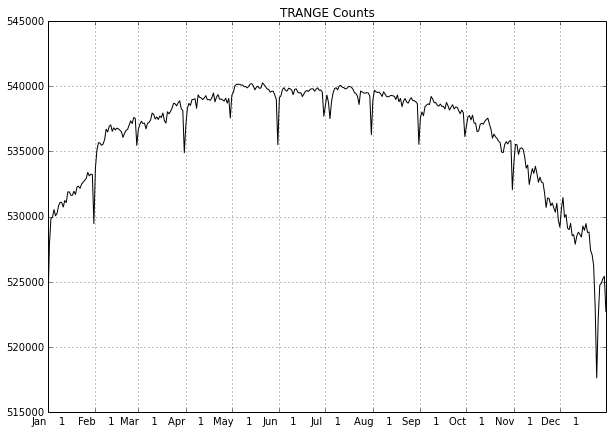

In [26]:
meas = 'TRANGE'
data = STAT[meas]
MyYearlyPlots(data['NE'].transpose(),ttl=meas+' Counts',color='k',drawgrid=True)

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


### Answer for Extra Credit Questions
#### Lower counts
* Some possible reasons for having lower counts at the end of the year are 
    * some stations are closed for annual checkout, winter break, or holidays (Christmas and New Year) every year.
    * stations need to do long-term equipment checkout every other $x$ years. They take turns to checkout. For those that should do long-term equipment checkout, they do it around December and/or January.
* Some possible reasons for having sudden dip at the end of each month are
    * some stations are closed for monthly checkout every month.
    * stations need to do short-term equipment checkout every other $y$ years. They take turns to checkout. For those that should do checkout in the month, they do it at the end of each month
* It is possible that it is restricted to a subset of the stations. We can verify this guess and remove this effect by filtering out those stations whose variance of data count across dates of years/months is larger than a threshold. The greater the variance is, the more likely the station has fluctuating data. If The it is always some certain stations that have large variance in every years, then we can conclude that the fluctuating data is restricted to this subset of stations.

#### Can you Explain the counts per day for "SNWD" ?
* Perhaps the checkout of snowfall measuring equipment is different from the equipmenet checkout of temperature measuring equipment, so SNWD has lower counts, but different from that of temperature counts.

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\\pm$ std
3. Plot of top 3 eigenvectors

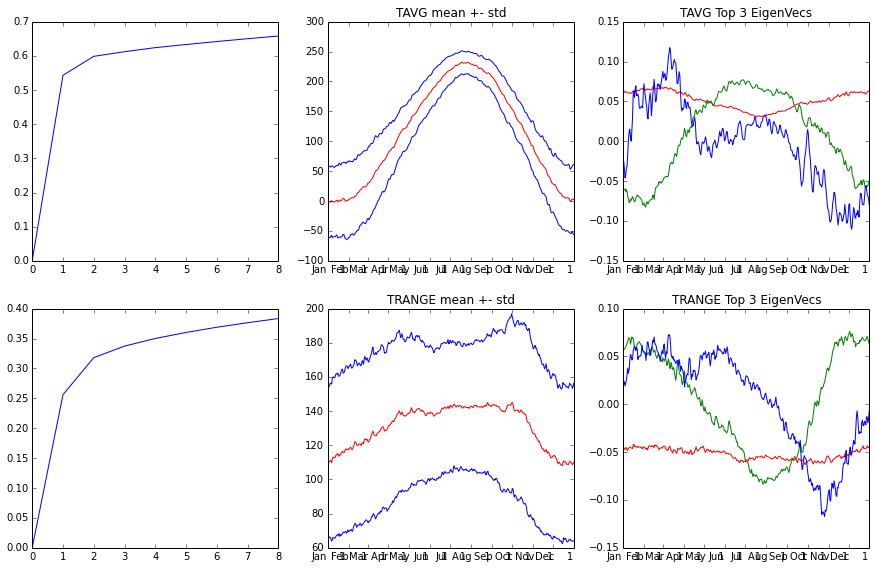

In [27]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    
    data = STAT[meas]
    ## Your code for Histogram
    
    eigval = data['eigval']
    s = eigval.sum()
    percent = np.array([eigval[:topk].sum()/s for topk in range(9)])
    plt.plot(percent)
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    mean = data['Mean']
    var = data['Var']/data['std']
    MyYearlyPlots(np.array([mean,mean+var,mean-var]),ttl=meas+' mean +- std',color='rbb')
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    MyYearlyPlots(data['eigvec'].transpose()[:3],ttl=meas+' Top 3 EigenVecs',color='rgb')